In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from fast_ml.outlier_treatment import OutlierTreatment

# Exploratory Data Analysis

In [96]:
# Cargar datos
train_df = pd.read_excel('E-Commerce_train.xlsx')
test_df = pd.read_excel('E-Commerce_test.xlsx')

In [97]:
train_df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [98]:
# Remover columna index innecesaria 
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)
train_df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [99]:
# Normalizar columnas
train_df.columns = ['warehouse_block','mode_of_shipment','customer_care_calls','customer_rating',
'cost_of_the_product','prior_purchases','product_importance','gender','discount_offered',
'weight_in_gms','reached.on.time_y.n']
test_df.columns = ['warehouse_block','mode_of_shipment','customer_care_calls','customer_rating',
'cost_of_the_product','prior_purchases','product_importance','gender','discount_offered',
'weight_in_gms']
train_df.head()

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [100]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      8999 non-null   object
 1   mode_of_shipment     8999 non-null   object
 2   customer_care_calls  8999 non-null   int64 
 3   customer_rating      8999 non-null   int64 
 4   cost_of_the_product  8999 non-null   int64 
 5   prior_purchases      8999 non-null   int64 
 6   product_importance   8999 non-null   object
 7   gender               8999 non-null   object
 8   discount_offered     8999 non-null   int64 
 9   weight_in_gms        8999 non-null   int64 
 10  reached.on.time_y.n  8999 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 773.5+ KB


In [101]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_care_calls,8999.0,4.015113,1.138934,2.0,3.0,4.0,5.0,7.0
customer_rating,8999.0,2.994999,1.413143,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,8999.0,208.561507,48.289172,96.0,168.0,211.0,249.5,310.0
prior_purchases,8999.0,3.511501,1.532074,2.0,3.0,3.0,4.0,10.0
discount_offered,8999.0,15.097678,17.400040,1.0,4.0,8.0,19.0,65.0
weight_in_gms,8999.0,3584.364596,1614.750194,1001.0,1857.0,4046.0,4999.5,7846.0
reached.on.time_y.n,8999.0,0.635515,0.481312,0.0,0.0,1.0,1.0,1.0


In [102]:
ontime = train_df['reached.on.time_y.n'].value_counts()[1]
delayed = train_df['reached.on.time_y.n'].value_counts()[0]
print(f"Llegó a tiempo: {ontime} | {round(ontime/8999*100,2)}%")
print(f"No llegó a tiempo: {delayed} | {round(delayed/8999*100,2)}%")

Llegó a tiempo: 5719 | 63.55%
No llegó a tiempo: 3280 | 36.45%


# Encoding

In [103]:
# Transformar valores categóricos a valores numéricos
df_ohe = train_df.copy()
label_1 = pd.get_dummies(df_ohe, prefix='warehouse_block', columns=['warehouse_block'])
label_2 = pd.get_dummies(label_1, prefix='mode_of_shipment', columns=['mode_of_shipment'])
label_3 = pd.get_dummies(label_2, prefix='product_importance', columns=['product_importance'])
label_4 = pd.get_dummies(label_3, prefix='gender', columns=['gender'])
# Ordernar columnas
train_df = label_4[['warehouse_block_A','warehouse_block_B','warehouse_block_C','warehouse_block_D','warehouse_block_F','mode_of_shipment_Flight','mode_of_shipment_Road','mode_of_shipment_Ship','customer_care_calls','customer_rating','cost_of_the_product','prior_purchases','product_importance_low','product_importance_medium','product_importance_high','gender_F','gender_M','discount_offered','weight_in_gms','reached.on.time_y.n']]

df_ohe = test_df.copy()
label_1 = pd.get_dummies(df_ohe, prefix='warehouse_block', columns=['warehouse_block'])
label_2 = pd.get_dummies(label_1, prefix='mode_of_shipment', columns=['mode_of_shipment'])
label_3 = pd.get_dummies(label_2, prefix='product_importance', columns=['product_importance'])
label_4 = pd.get_dummies(label_3, prefix='gender', columns=['gender'])
test_df = label_4[['warehouse_block_A','warehouse_block_B','warehouse_block_C','warehouse_block_D','warehouse_block_F','mode_of_shipment_Flight','mode_of_shipment_Road','mode_of_shipment_Ship','customer_care_calls','customer_rating','cost_of_the_product','prior_purchases','product_importance_low','product_importance_medium','product_importance_high','gender_F','gender_M','discount_offered','weight_in_gms']]

train_df.head()

,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance_low,product_importance_medium,product_importance_high,gender_F,gender_M,discount_offered,weight_in_gms,reached.on.time_y.n
0,0,0,0,1,0,1,0,0,4,2,177,3,1,0,0,1,0,44,1233,1
1,0,0,0,0,1,1,0,0,4,5,216,2,1,0,0,0,1,59,3088,1
2,1,0,0,0,0,1,0,0,2,2,183,4,1,0,0,0,1,48,3374,1
3,0,1,0,0,0,1,0,0,3,3,176,4,0,1,0,0,1,10,1177,1
4,0,0,1,0,0,1,0,0,2,2,184,3,0,1,0,1,0,46,2484,1


<AxesSubplot:>

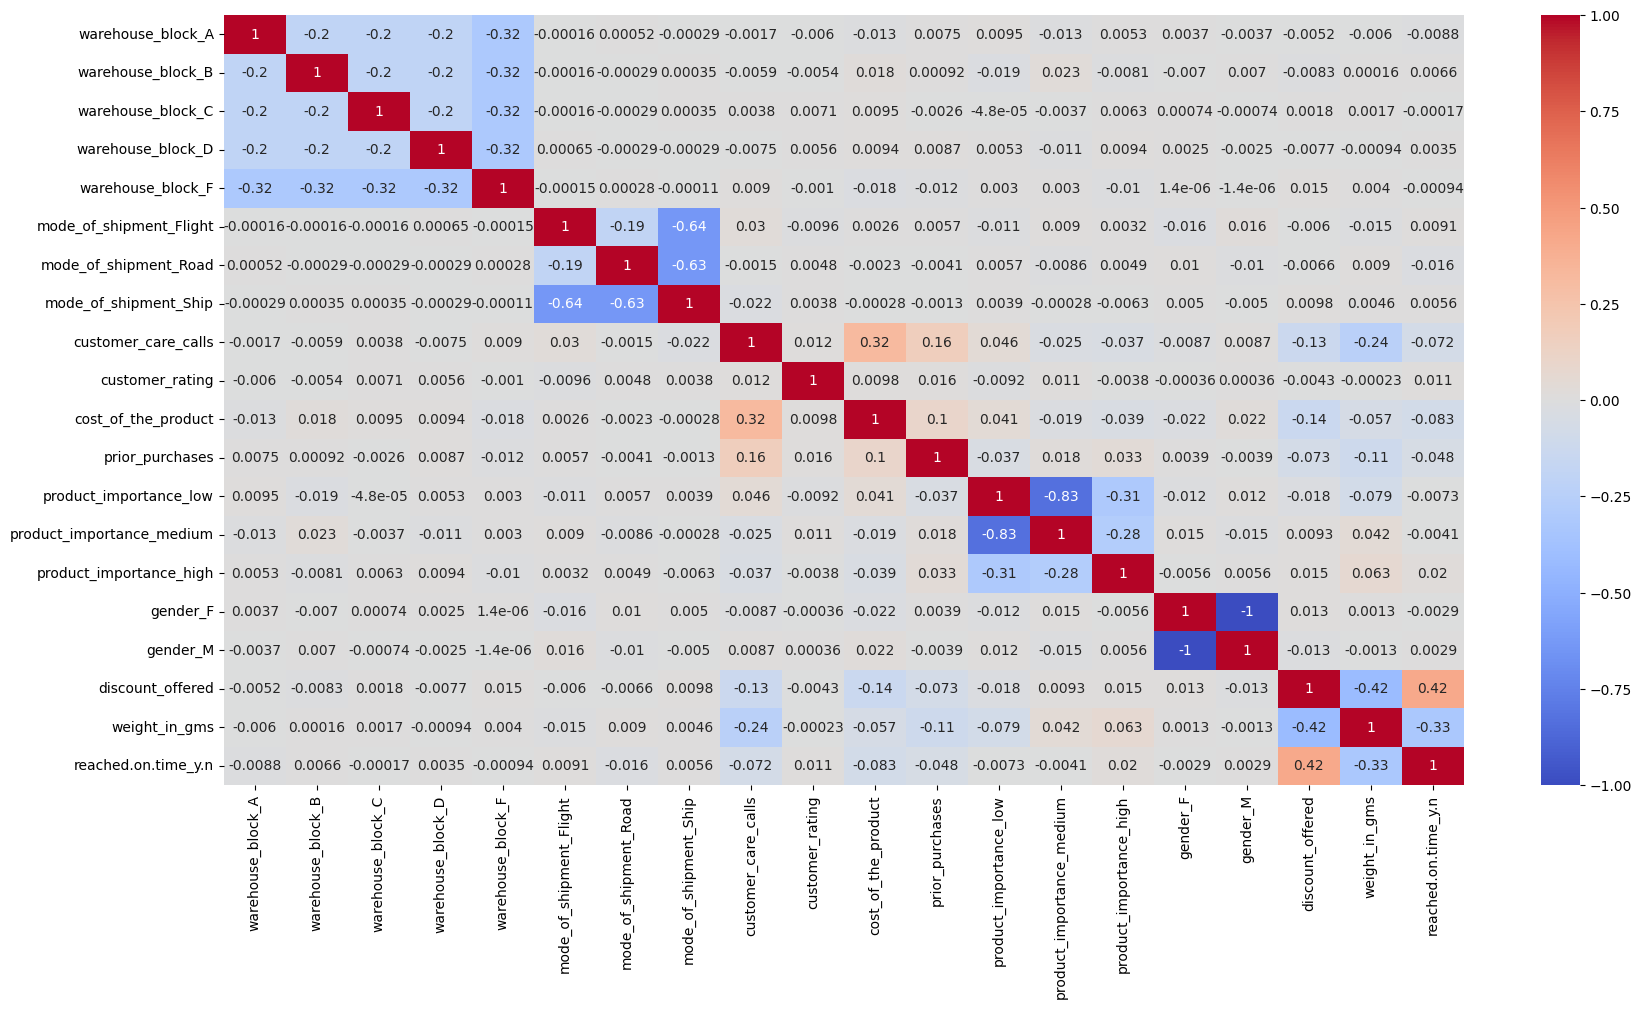

In [104]:
# Graficar correlaciones
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

# Outliers

<AxesSubplot:>

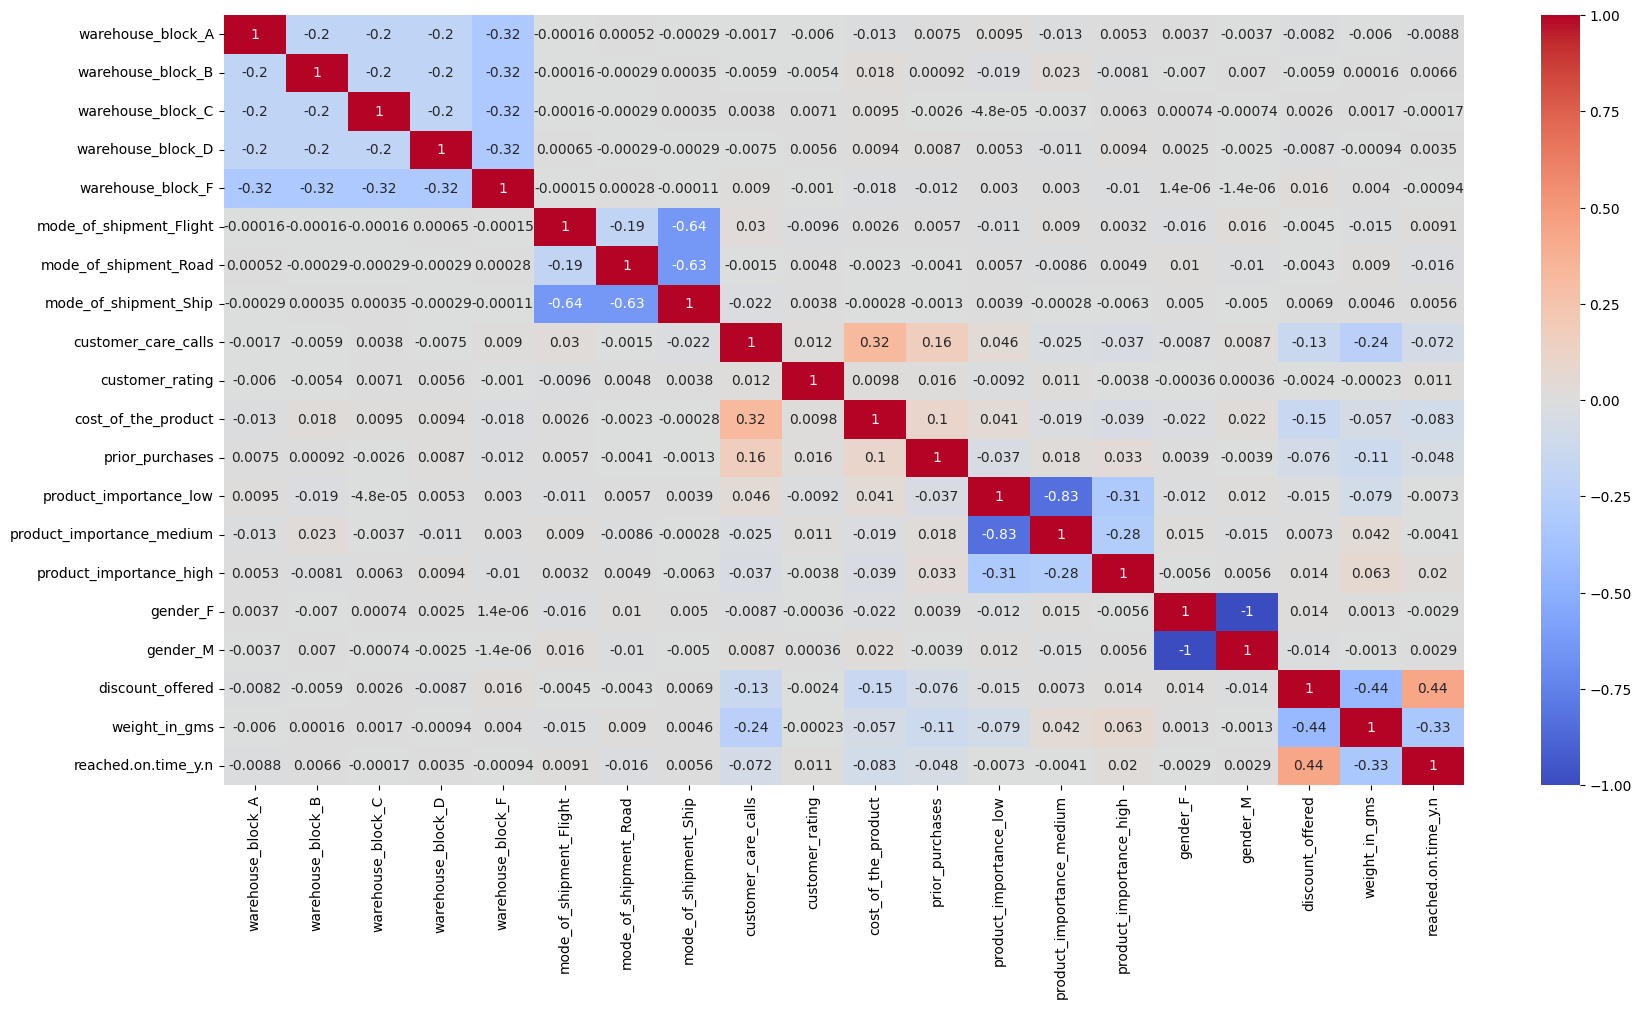

In [105]:
ots = OutlierTreatment()
ots.fit(train_df, ['discount_offered'])
train_df = ots.transform(train_df)
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')

# Modelado

In [106]:
# Dividir dataframe en features y label
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]
X.shape, y.shape

((8999, 19), (8999,))

In [107]:
# Separar datos para entrenar y testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [108]:
# Escalar datos
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [109]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_test)
print(f"Logistic Regression\nPrecisión: {lr.score(X_test, y_test)}")
print(f"Recall: {recall_score(y_test, y_test_pred_lr)}")
print(classification_report(y_test, y_test_pred_lr))

Logistic Regression
Precisión: 0.6662222222222223
Recall: 0.7373949579831933
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       822
           1       0.74      0.74      0.74      1428

    accuracy                           0.67      2250
   macro avg       0.64      0.64      0.64      2250
weighted avg       0.67      0.67      0.67      2250



#### Random Forest Classification

In [110]:
rfc = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4, random_state=0)
rfc.fit(X_train, y_train)
y_test_pred_rfc = rfc.predict(X_test)
y_train_pred_rfc = rfc.predict(X_train)
print(f"Random Forest Classification\nPrecisión: {rfc.score(X_test, y_test)}")
print(f"Recall: {recall_score(y_test, y_test_pred_rfc)}")
print(classification_report(y_test, y_test_pred_rfc))

Random Forest Classification
Precisión: 0.6924444444444444
Recall: 0.6351540616246498
              precision    recall  f1-score   support

           0       0.56      0.79      0.65       822
           1       0.84      0.64      0.72      1428

    accuracy                           0.69      2250
   macro avg       0.70      0.71      0.69      2250
weighted avg       0.74      0.69      0.70      2250



#### K-Nearest Neighbors

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn = knn.predict(X_train)
print(f"K-Nearest Neighbors\nPrecisión: {knn.score(X_test, y_test)}")
print(f"Recall: {recall_score(y_test, y_test_pred_knn)}")
print(classification_report(y_test, y_test_pred_knn))

K-Nearest Neighbors
Precisión: 0.6635555555555556
Recall: 0.7093837535014006
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       822
           1       0.75      0.71      0.73      1428

    accuracy                           0.66      2250
   macro avg       0.64      0.65      0.64      2250
weighted avg       0.67      0.66      0.67      2250



#### Decision Tree Classification

In [112]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_test_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc = dtc.predict(X_train)
print(f"Decision Tree Classification\nPrecisión: {dtc.score(X_test, y_test)}")
print(f"Recall: {recall_score(y_test, y_test_pred_dtc)}")
print(classification_report(y_test, y_test_pred_dtc))

Decision Tree Classification
Precisión: 0.6884444444444444
Recall: 0.7478991596638656
              precision    recall  f1-score   support

           0       0.57      0.59      0.58       822
           1       0.76      0.75      0.75      1428

    accuracy                           0.69      2250
   macro avg       0.66      0.67      0.67      2250
weighted avg       0.69      0.69      0.69      2250



# Matriz de confusión

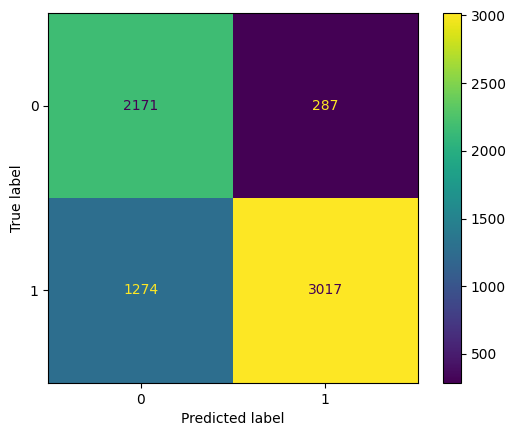

In [113]:
matrix_rfc = confusion_matrix(y_train, y_train_pred_rfc)
matrix_knn = confusion_matrix(y_train, y_train_pred_knn)
matrix_dtc = confusion_matrix(y_train, y_train_pred_dtc)
# Graficar matriz
cm_display = ConfusionMatrixDisplay(matrix_rfc)
cm_display.plot()

## Probar modelos en dataframe de testeo (E-Commerce_test.xlsx)

In [114]:
test_df.head()

,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance_low,product_importance_medium,product_importance_high,gender_F,gender_M,discount_offered,weight_in_gms
0,0,0,0,0,1,0,0,1,5,1,189,2,0,1,0,0,1,10,5248
1,0,0,0,1,0,0,0,1,5,3,150,2,0,0,1,1,0,9,4446
2,0,0,0,0,1,0,0,1,3,3,200,3,1,0,0,0,1,3,5739
3,1,0,0,0,0,0,0,1,5,1,133,2,0,1,0,0,1,1,4643
4,0,1,0,0,0,0,0,1,4,2,260,3,1,0,0,0,1,4,5504


In [115]:
X_test = test_df
# Escalar
X_test = scaler.transform(X_test)

In [116]:
# Predecir usando Logistic Regression
pred_lr = lr.predict(X_test)
pred_lr_df = pd.DataFrame(data=pred_lr, columns=['pred'])
pred_lr_df.to_csv('AstradaT_lr_ots.csv', index=False)
ontime = pred_lr_df['pred'].value_counts()[1]
delayed = pred_lr_df['pred'].value_counts()[0]
print(f"Llegó a tiempo: {ontime} | {round(ontime/2000*100,2)}%")
print(f"No llegó a tiempo: {delayed} | {round(delayed/2000*100,2)}%")


Llegó a tiempo: 1076 | 53.8%
No llegó a tiempo: 924 | 46.2%


In [117]:
# Predecir usando Random Forest Classification
pred_rfc = rfc.predict(X_test)
pred_rfc_df = pd.DataFrame(data=pred_rfc, columns=['pred'])
pred_rfc_df.to_csv('AstradaT_rfc_ots.csv', index=False)
ontime = pred_rfc_df['pred'].value_counts()[1]
delayed = pred_rfc_df['pred'].value_counts()[0]
print(f"Llegó a tiempo: {ontime} | {round(ontime/2000*100,2)}%")
print(f"No llegó a tiempo: {delayed} | {round(delayed/2000*100,2)}%")

Llegó a tiempo: 607 | 30.35%
No llegó a tiempo: 1393 | 69.65%


In [118]:
# Predecir usando K-Nearest Neighbors
pred_knn = knn.predict(X_test)
pred_knn_df = pd.DataFrame(data=pred_knn, columns=['pred'])
pred_knn_df.to_csv('AstradaT_knn_ots.csv', index=False)
ontime = pred_knn_df['pred'].value_counts()[1]
delayed = pred_knn_df['pred'].value_counts()[0]
print(f"Llegó a tiempo: {ontime} | {round(ontime/2000*100,2)}%")
print(f"No llegó a tiempo: {delayed} | {round(delayed/2000*100,2)}%")

Llegó a tiempo: 928 | 46.4%
No llegó a tiempo: 1072 | 53.6%


In [119]:
# Predecir usando Decision Tree Classification
pred_dtc = dtc.predict(X_test)
pred_dtc_df = pd.DataFrame(data=pred_dtc, columns=['pred'])
pred_dtc_df.to_csv('AstradaT_dtc_ots.csv', index=False)
ontime = pred_dtc_df['pred'].value_counts()[1]
delayed = pred_dtc_df['pred'].value_counts()[0]
print(f"Llegó a tiempo: {ontime} | {round(ontime/2000*100,2)}%")
print(f"No llegó a tiempo: {delayed} | {round(delayed/2000*100,2)}%")

Llegó a tiempo: 906 | 45.3%
No llegó a tiempo: 1094 | 54.7%
